In [2]:
import itertools
import pathlib

import matplotlib as mpl
import numpy as np
import pandas as pd
import scanpy as sc
import scirpy as ir
import seaborn as sns

%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D

savefig_args = {
    "dpi": 600,
    "bbox_inches": "tight",
    "pad_inches": 0,
    "transparent": True,
}
output_dir = "../../figures/figure3"
pathlib.Path(output_dir).mkdir(parents=True, exist_ok=True)
output_suffix = ""
output_formats = [".png", ".svg", ".eps"]
sc.settings.figdir = output_dir
sc.set_figure_params(format="pdf", transparent=True)
sc.settings.figdir = output_dir
sc.set_figure_params(dpi_save=600)
sc.set_figure_params(figsize=[5,5])


def save_figure(
    fig,
    name,
    output_dir=output_dir,
    output_suffix=output_suffix,
    output_formats=output_formats,
    savefig_args=savefig_args,
):
    for output_format in output_formats:
        fig.savefig(
            output_dir + "/" + name + output_suffix + output_format, **savefig_args
        )
    return None


sns.set_context("paper")
pd.set_option("display.max_rows", 50)
pd.set_option("display.max_columns", 20)
pd.set_option("display.width", 100)
plt.style.use("../../scripts/paper.mplstyle")
width = plt.rcParams["figure.figsize"][0]
height = plt.rcParams["figure.figsize"][1]
plt.style.use('seaborn-whitegrid')
%run ../../scripts/plotting_helper.py

In [3]:
adata = sc.read_h5ad("../../processed_data/h5ad_objects/bcells.h5ad")

adata = adata[adata.obs.clone_id != '25213']

adata.obs.sample_id.value_counts()

Day 0        15881
Day 4         8553
BM CD138+     4685
Day 8         2037
PBMC          1245
Day 12         819
BMMNC          642
Name: sample_id, dtype: int64

In [4]:
print(adata)
filter_low_abundance_celltypes = True
if filter_low_abundance_celltypes:
    select = adata.obs.bcelltype_multi.value_counts() > (adata.obs.shape[0] / 1000)
    adata = adata[adata.obs.bcelltype_multi.isin(select[select == True].index)]
    print(adata.obs.shape)
ird = adata.obs

View of AnnData object with n_obs × n_vars = 33862 × 36601
    obs: 'multi_chain', 'extra_chains', 'has_ir', 'is_cell', 'high_confidence', 'IR_VJ_1_c_call', 'IR_VJ_2_c_call', 'IR_VDJ_1_c_call', 'IR_VDJ_2_c_call', 'IR_VJ_1_cdr1', 'IR_VJ_2_cdr1', 'IR_VDJ_1_cdr1', 'IR_VDJ_2_cdr1', 'IR_VJ_1_cdr1_aa', 'IR_VJ_2_cdr1_aa', 'IR_VDJ_1_cdr1_aa', 'IR_VDJ_2_cdr1_aa', 'IR_VJ_1_cdr2', 'IR_VJ_2_cdr2', 'IR_VDJ_1_cdr2', 'IR_VDJ_2_cdr2', 'IR_VJ_1_cdr2_aa', 'IR_VJ_2_cdr2_aa', 'IR_VDJ_1_cdr2_aa', 'IR_VDJ_2_cdr2_aa', 'IR_VJ_1_cdr3', 'IR_VJ_2_cdr3', 'IR_VDJ_1_cdr3', 'IR_VDJ_2_cdr3', 'IR_VJ_1_cdr3_aa', 'IR_VJ_2_cdr3_aa', 'IR_VDJ_1_cdr3_aa', 'IR_VDJ_2_cdr3_aa', 'IR_VJ_1_consensus_count', 'IR_VJ_2_consensus_count', 'IR_VDJ_1_consensus_count', 'IR_VDJ_2_consensus_count', 'IR_VJ_1_d_call', 'IR_VJ_2_d_call', 'IR_VDJ_1_d_call', 'IR_VDJ_2_d_call', 'IR_VJ_1_d_cigar', 'IR_VJ_2_d_cigar', 'IR_VDJ_1_d_cigar', 'IR_VDJ_2_d_cigar', 'IR_VJ_1_duplicate_count', 'IR_VJ_2_duplicate_count', 'IR_VDJ_1_duplicate_count', 'IR_VDJ_2_d

# Fig 3A

/home/michaelswift/repos/seqclone3/analysis/scripts/plotting_helper.py:370: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['CloneLabel'] = adata.obs[clone_label].map(inv_map)


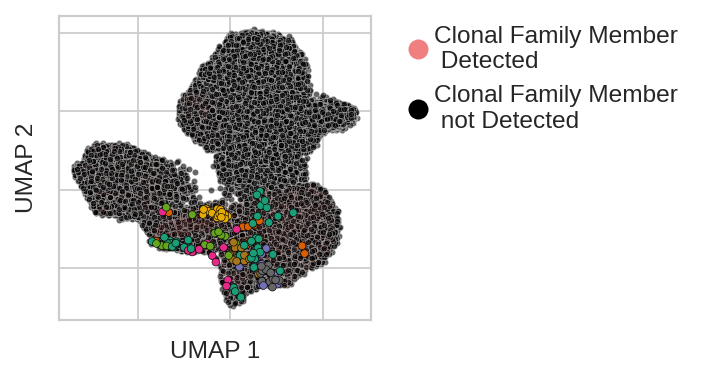

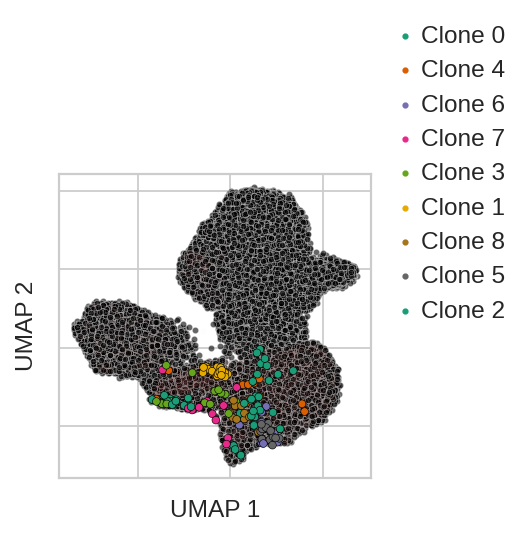

In [5]:
fig1 = plot_ClonalUMAP(adata, "UMAP", "clone_id", 10, 8, 1.5, True)

fig2 = plot_ClonalUMAP(adata, "UMAP", "clone_id", 10, 8, 1.5, False)

save_figure(fig2, "UMAPClones_10")
save_figure(fig1, "UMAPClones_10_custom_legend")

In [24]:
# set # of bootstraps for tests
nboots = 1000


In [25]:
ftc = ird[ird.sample_id.str.contains("Day")]

In [26]:
print(ftc.shape[0], "cells in the in vitro time course")
tc = ftc[~ftc.sample_id.str.contains("Day 0")]
print(tc.shape[0], "cells in the Days 4, 8, 12")
clones = selection_helper(ftc, "clone_id", 1)
print(clones.shape[0], "cells with a related member in dataset")

27150 cells in the in vitro time course
11333 cells in the Days 4, 8, 12
5248 cells with a related member in dataset


# Clone Size Distribution in Time Course

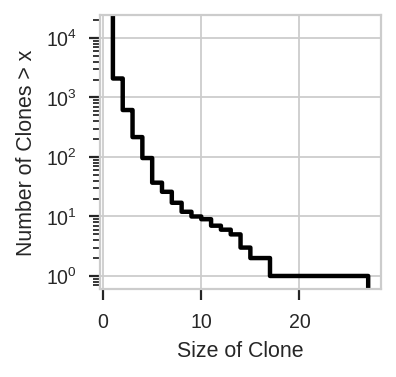

In [27]:
fig, ax = plt.subplots(1, 1)
data = ftc.clone_id.cat.remove_unused_categories().value_counts()
sns.ecdfplot(
    data=data,
    stat="count",
    color="k",
    complementary=True,
    lw=2,
)
plt.yscale("log")
plt.ylabel("Number of Clones > x")
plt.xlabel("Size of Clone")
save_figure(fig, "clone_size_distribution")

# Persistent Clones

([<matplotlib.axis.XTick at 0x7f96eedf7be0>,
 [Text(0.5, 0, '0.5'),
  Text(1.0, 0, '1.0'),
  Text(1.5, 0, '1.5'),
  Text(2.0, 0, '2.0'),
  Text(2.5, 0, '2.5')])

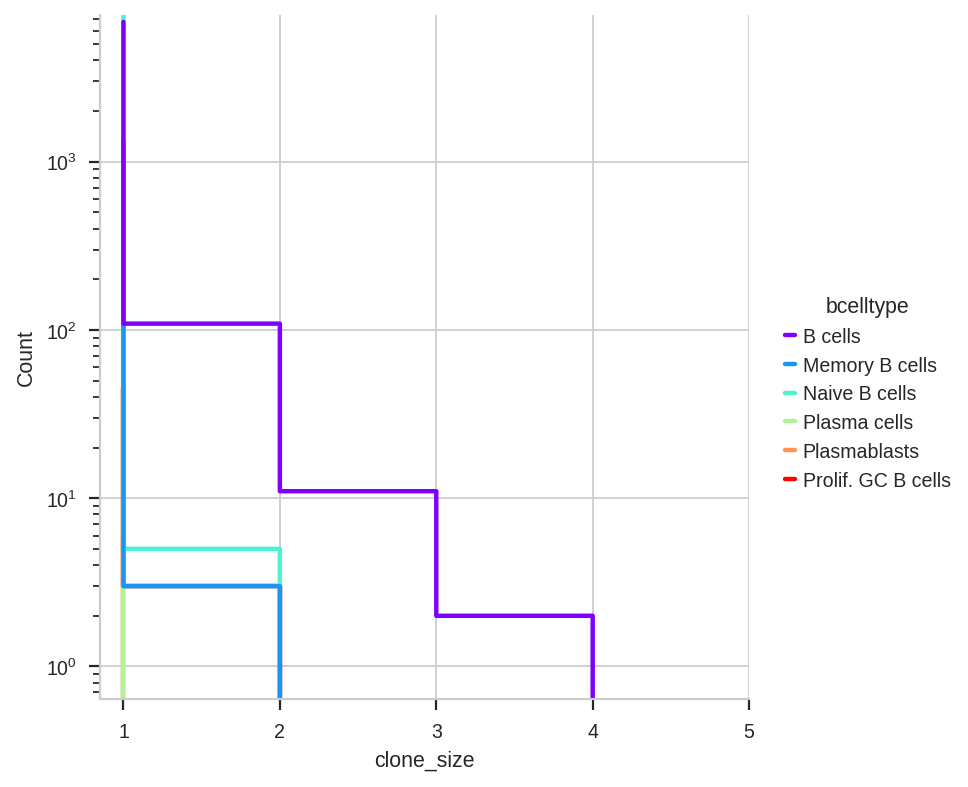

In [28]:
palette = bcelltype_colors
scale = 1
label = "bcelltype"
timepoint = "Day 0"
clone_sizes = (ird.groupby(["sample_id", label]).clone_id.value_counts()).xs(timepoint)
# expand by 9 divisions
clone_size_model = (clone_sizes * 2**9).reset_index()
clone_size_model.columns = [label, "clone_id", "clone_size"]
# Observed input clone size distribution
clone_sizes = clone_sizes.reset_index()
clone_sizes.columns = [label, "clone_id", "clone_size"]
clone_sizes = clone_sizes[clone_sizes.clone_size > 0]
sns.displot(
    clone_sizes, x="clone_size", hue=label, kind="ecdf", palette=palette, complementary=True, lw=2, stat='count'
)
plt.yscale("log")
plt.xticks([1, 2, 3, 4, 5])

/home/michaelswift/miniconda3/envs/muon/lib/python3.9/site-packages/seaborn/categorical.py:1733: UserWarning: You passed a edgecolor/edgecolors ([(0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255)]) for an unfilled marker ('|').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y,
/home/michaelswift/miniconda3/envs/muon/lib/python3.9/site-packages/seaborn/categorical.py:1733: UserWarning: You passed a edgecolor/edgecolors ([(0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137

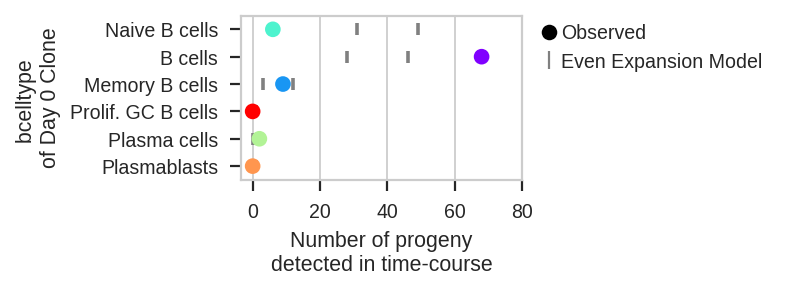

In [29]:
order = adata.obs[label].unique().to_list()
sns.set_context('paper')
# Perisent clones
ird = adata.obs
# clones found in more than 1 sample
selector = ird.groupby("clone_id").sample_id.nunique() > 1
clone_ids = selector[selector == True].index
persistent = ird[ird.clone_id.isin(clone_ids)]

day0_persistent = persistent[persistent["sample_id"] == "Day 0"]
observed = pd.DataFrame(day0_persistent[label].value_counts().reset_index())
observed.columns = [label, "number of cells"]

# BootStrap
samples = day0_persistent[label].shape[0]
nboots = nboots
bootstrapped_stats = []
for i in range(nboots):
    # sample data
    bootstrapped_data = clone_size_model.sample(
        n=samples, weights=clone_size_model.clone_size, replace=True
    )[label].value_counts()
    bootstrapped_data = pd.DataFrame(bootstrapped_data).reset_index()
    bootstrapped_stats.append(bootstrapped_data)
data = pd.concat(bootstrapped_stats)
data.columns = [label, "number of cells"]

y = label
x = "number of cells"
fig, ax = plt.subplots(1, 1, figsize=(width, height*0.6))
sns.pointplot(
    data=data,
    x=x,
    y=y,
    ci=None,
    join=False,
    estimator=lambda x: np.percentile(x, 2.5),
    alpha=0.5,
    color="gray",
    legend=False,
    dodge=0.3,
    order=order,
    markers="|",
)

sns.pointplot(
    data=data,
    x=x,
    y=y,
    ci=None,
    markers="|",
    join=False,
    estimator=lambda x: np.percentile(x, 97.5),
    alpha=0.5,
    color="gray",
    legend=False,
    dodge=0.3,
    order=order,
)
sns.pointplot(
    data=observed,
    x=x,
    y=y,
    ci=None,
    join=False,
    color="k",
    order=order,
    palette=bcelltype_colors,
)
plt.xlabel("Number of progeny\ndetected in time-course")
plt.ylabel("bcelltype \nof Day 0 Clone")

# Construct Legend
legend_elements = [
    Line2D(
        [0],
        [0],
        marker="o",
        color="w",
        label="Observed",
        linewidth=0,
        markersize=4,
        markerfacecolor="black",
    ),
    Line2D(
        [0],
        [0],
        marker="|",
        color="gray",
        label="Even Expansion Model",
        markerfacecolor="gray",
        linewidth=0,
        markersize=4,
    ),
]
ax.legend(
    handles=legend_elements, bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0
)
plt.xticks([0, 20, 40, 60, 80])
save_figure(fig, "persistence_plot_even_expansion_model")

# B Cell Multi

([<matplotlib.axis.XTick at 0x7f96eeaedc40>,
 [Text(0.5, 0, '0.5'),
  Text(1.0, 0, '1.0'),
  Text(1.5, 0, '1.5'),
  Text(2.0, 0, '2.0'),
  Text(2.5, 0, '2.5')])

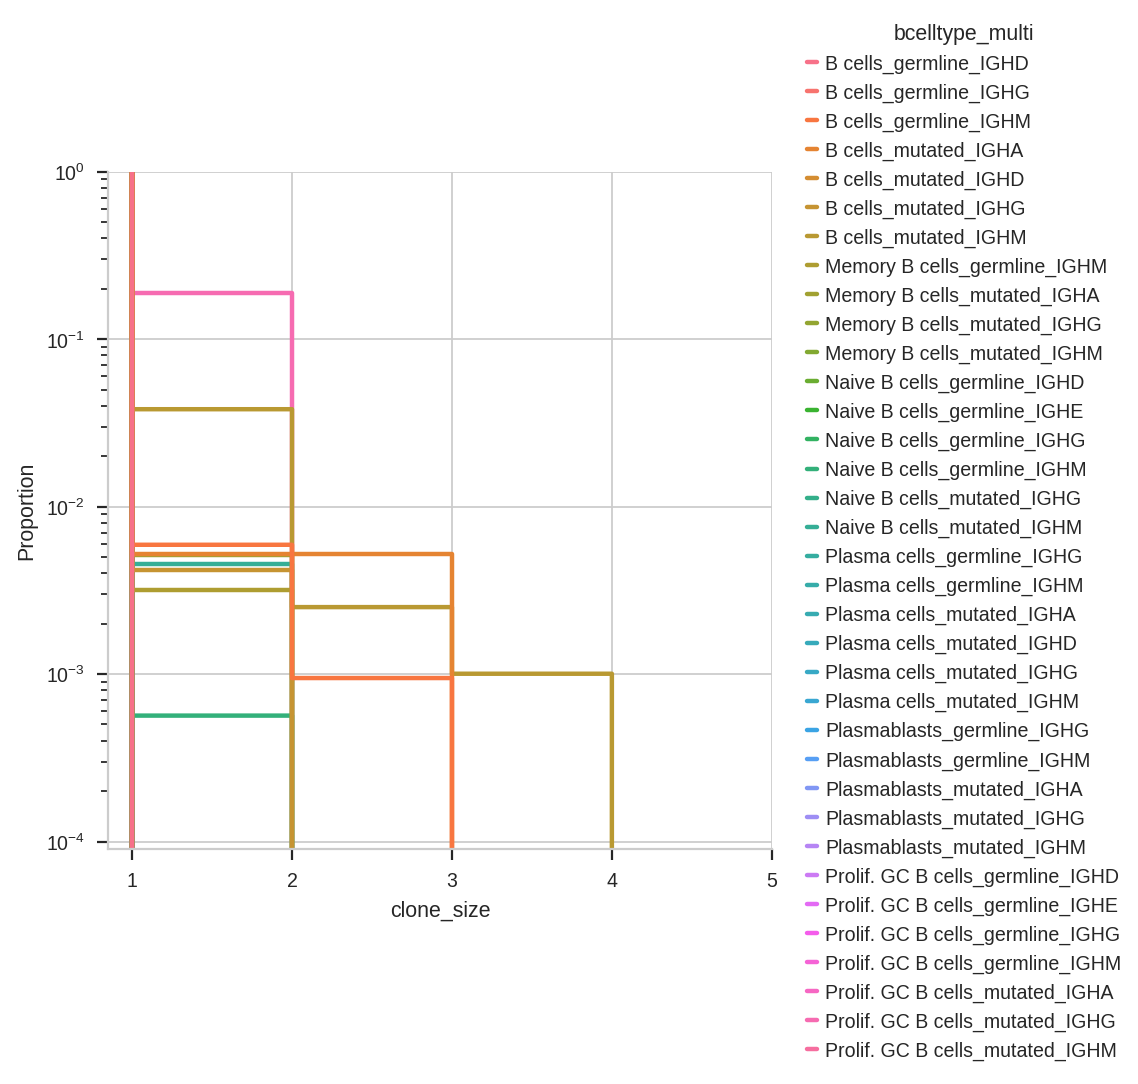

In [30]:
#palette = bcelltype_multi_colors

scale = 1
label = "bcelltype_multi"
order = list(adata.obs[label].unique())

timepoint = "Day 0"
clone_sizes = (ird.groupby(["sample_id", label]).clone_id.value_counts()).xs(timepoint)
# expand by 9 divisions
clone_size_model = (clone_sizes * 2**9).reset_index()
clone_size_model.columns = [label, "clone_id", "clone_size"]
# Observed input clone size distribution
clone_sizes = clone_sizes.reset_index()
clone_sizes.columns = [label, "clone_id", "clone_size"]
clone_sizes = clone_sizes[clone_sizes.clone_size > 0]
sns.displot(
    clone_sizes, x="clone_size", hue=label, kind="ecdf", complementary=True, lw=2
)
plt.yscale("log")
plt.xticks([1, 2, 3, 4, 5])

/home/michaelswift/miniconda3/envs/muon/lib/python3.9/site-packages/seaborn/categorical.py:1733: UserWarning: You passed a edgecolor/edgecolors ([(0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255)]) for an unfilled marker ('|').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y,
/home/michaelswift/miniconda3/envs/muon/lib/python3.9/site-packages/seaborn/categorical.py:1733: UserWarning: You passed a edgecolor/edgecolors ([(0.5019607843137255, 0.5019607843137255, 0.5019607843137

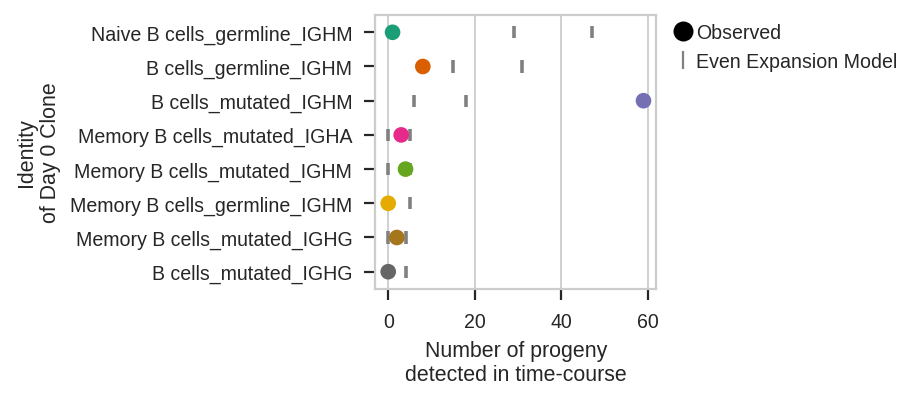

In [31]:
# Perisent clones
ird = adata.obs
# only plot the most abundant Day 0 cell types for brevity
order = ird[ird.sample_id == 'Day 0'][label].value_counts().index.to_list()[:8]
# clones found in more than 1 sample
selector = ird.groupby("clone_id").sample_id.nunique() > 1
clone_ids = selector[selector == True].index
persistent = ird[ird.clone_id.isin(clone_ids)]

day0_persistent = persistent[persistent["sample_id"] == "Day 0"]
observed = pd.DataFrame(day0_persistent[label].value_counts().reset_index())
observed.columns = [label, "number of cells"]

# BootStrap
samples = day0_persistent[label].shape[0]
nboots = nboots
bootstrapped_stats = []
for i in range(nboots):
    # sample data
    bootstrapped_data = clone_size_model.sample(
        n=samples, weights=clone_size_model.clone_size, replace=True
    )[label].value_counts()
    bootstrapped_data = pd.DataFrame(bootstrapped_data).reset_index()
    bootstrapped_stats.append(bootstrapped_data)
data = pd.concat(bootstrapped_stats)
data.columns = [label, "number of cells"]

y = label
x = "number of cells"
fig, ax = plt.subplots(1, 1, figsize=(width, height))
sns.pointplot(
    data=data,
    x=x,
    y=y,
    ci=None,
    join=False,
    estimator=lambda x: np.percentile(x, 2.5),
    alpha=0.5,
    color="gray",
    legend=False,
    dodge=0.3,
    order=order,
    markers="|", 
)

sns.pointplot(
    data=data,
    x=x,
    y=y,
    ci=None,
    markers="|",
    join=False,
    estimator=lambda x: np.percentile(x, 97.5),
    alpha=0.5,
    color="gray",
    legend=False,
    dodge=0.3,
    order=order,
)
sns.pointplot(
    data=observed,
    x=x,
    y=y,
    ci=None,
    join=False,
    color="k",
    order=order, palette="Dark2"
)
plt.xlabel("Number of progeny\ndetected in time-course")
plt.ylabel("Identity\nof Day 0 Clone")

# Construct Legend
legend_elements = [
    Line2D(
        [0],
        [0],
        marker="o",
        color="k",
        label="Observed",
        linewidth=0,
        markersize=4,
        markerfacecolor="k",
    ),
    Line2D(
        [0],
        [0],
        marker="|",
        color="gray",
        label="Even Expansion Model",
        markerfacecolor="gray",
        linewidth=0,
        markersize=4,
    ),
]
ax.legend(
    handles=legend_elements, bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0
)

In [32]:
save_figure(fig, "persistence_plot_even_expansion_model_multimodal")

# is the gene expression different between persistent cells and non-persistent B cells

In [33]:
# is the gene expression different between persistent cells and non-persistent:
adata.obs['persistent'] = adata.obs.index.isin(persistent.index)
adata.obs.persistent = adata.obs['persistent'].astype('category')

persistent                                 
False       Naive B cells_germline_IGHM        0.450356
            B cells_germline_IGHM              0.269896
            B cells_mutated_IGHM               0.128083
            Memory B cells_mutated_IGHA        0.024600
            Memory B cells_mutated_IGHM        0.023455
                                                 ...   
True        Naive B cells_germline_IGHD        0.000000
            Memory B cells_germline_IGHM       0.000000
            B cells_mutated_IGHG               0.000000
            B cells_mutated_IGHD               0.000000
            Prolif. GC B cells_mutated_IGHM    0.000000
Name: bcelltype_multi, Length: 54, dtype: float64
False    2015
True       59
Name: persistent, dtype: int64
bcelltype_multi            
B cells_mutated_IGHM  False    0.971553
                      True     0.028447
Name: persistent, dtype: float64


/home/michaelswift/miniconda3/envs/muon/lib/python3.9/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


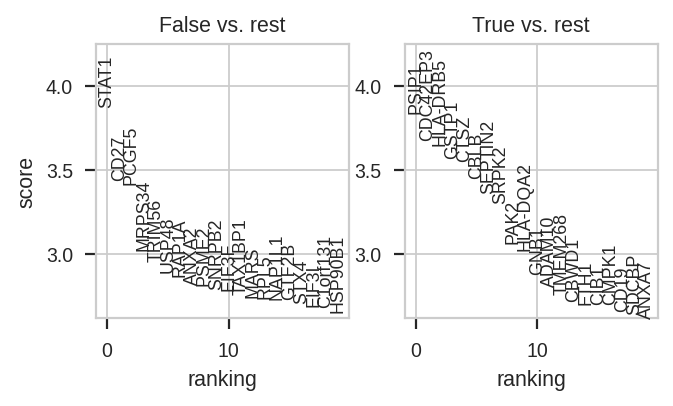

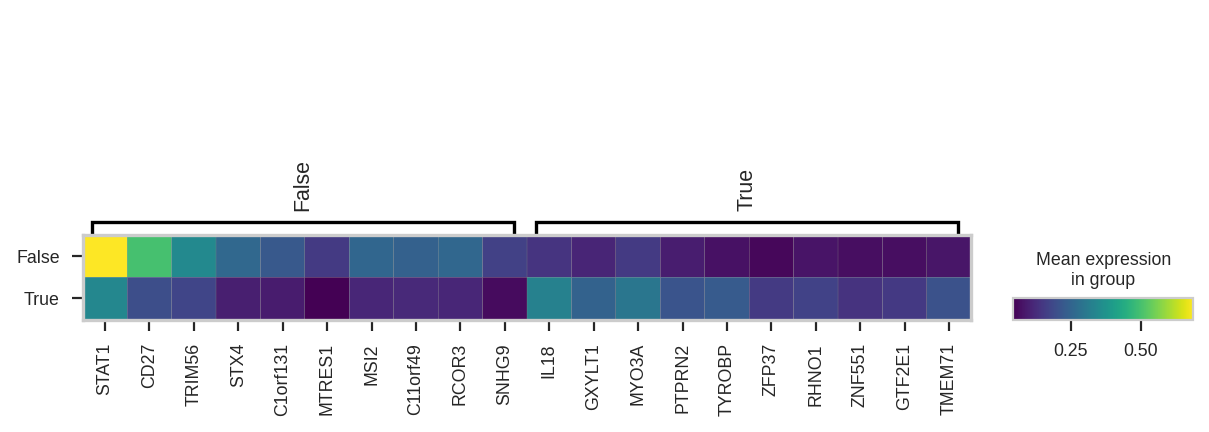

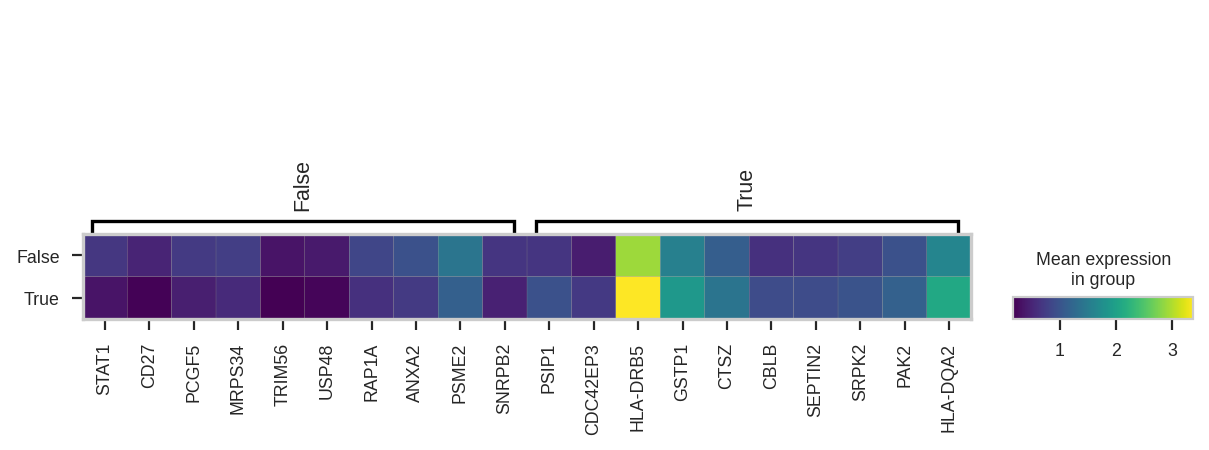

In [34]:
# is the gene expression different between persistent cells and
sub_adata = adata[adata.obs.sample_id.str.contains('Day 0')]
#sub_adata = adata
print(sub_adata.obs.groupby('persistent')['bcelltype_multi'].value_counts(normalize = True))
# subset to just the relevant multi-modal cell ID
sub_adata = sub_adata[sub_adata.obs.bcelltype_multi == 'B cells_mutated_IGHM']
print(sub_adata.obs.persistent.value_counts())
print(sub_adata.obs.groupby('bcelltype_multi')['persistent'].value_counts(normalize = True))

sc.tl.rank_genes_groups(sub_adata, groupby='persistent', method = 'wilcoxon')
sc.pl.rank_genes_groups(sub_adata)
sc.pl.rank_genes_groups_matrixplot(sub_adata, min_logfoldchange=1)
sc.pl.rank_genes_groups_matrixplot(sub_adata)

#sc.pl.rank_genes_groups_matrixplot(sub_adata, values_to_plot="pvals")

fig = sc.pl.rank_genes_groups_stacked_violin(sub_adata, groupby='persistent', min_logfoldchange=1, return_fig=True, )

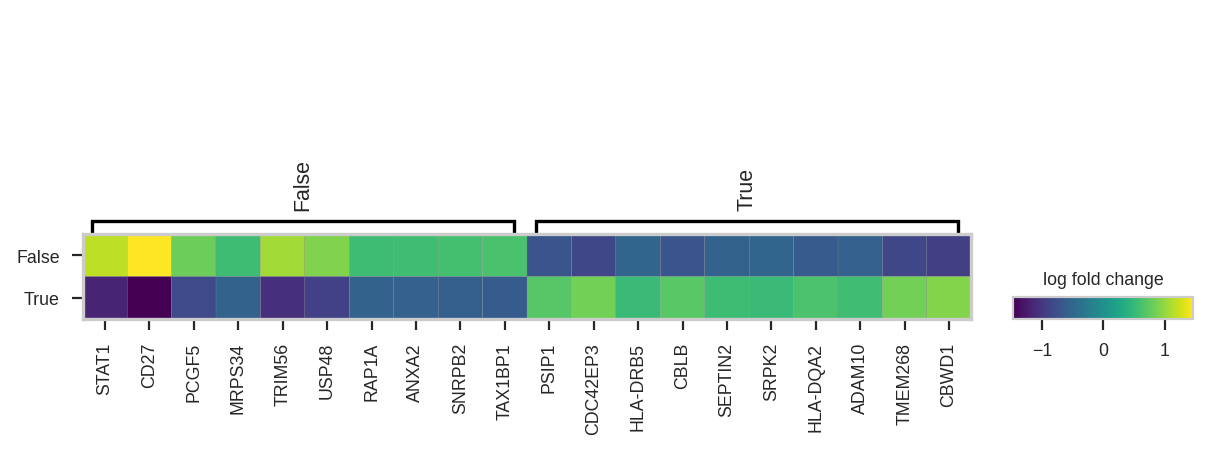

In [35]:
sc.pl.rank_genes_groups_matrixplot(sub_adata, min_logfoldchange=0.5, values_to_plot="logfoldchanges")


In [36]:
mzblike=["SOX5", "CD1C", "TFEC", "KLK1", "MPP6"]

nonmzblike = ["STAT1", "CD27", "CLINT1", "TAX1BP1", "RCOR3"]

In [37]:
fig = sc.pl.stacked_violin(sub_adata, var_names = mzblike + nonmzblike, groupby='persistent', return_fig=True)

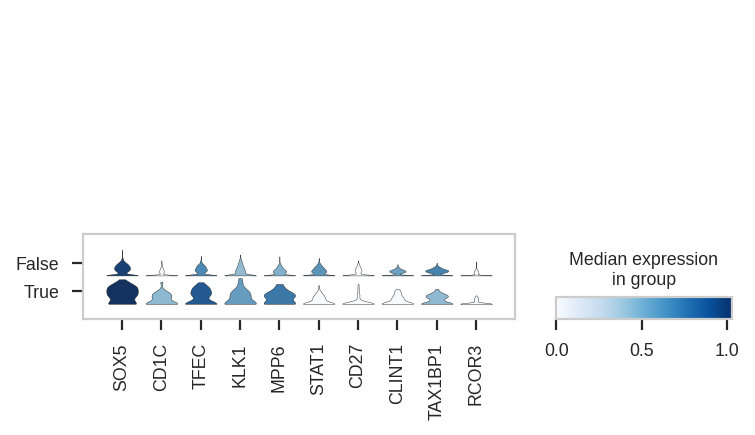

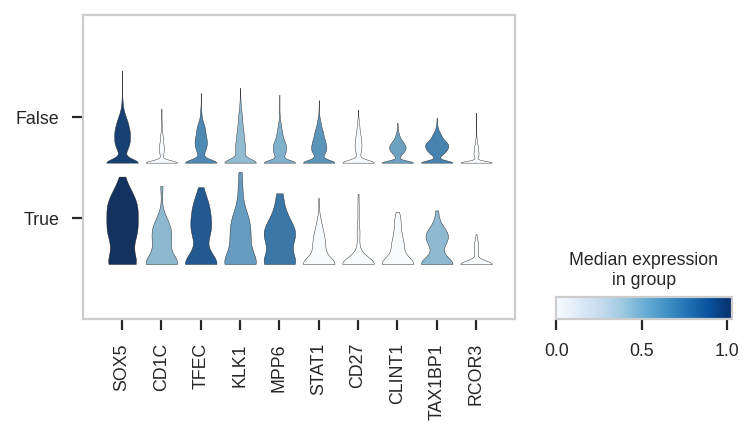

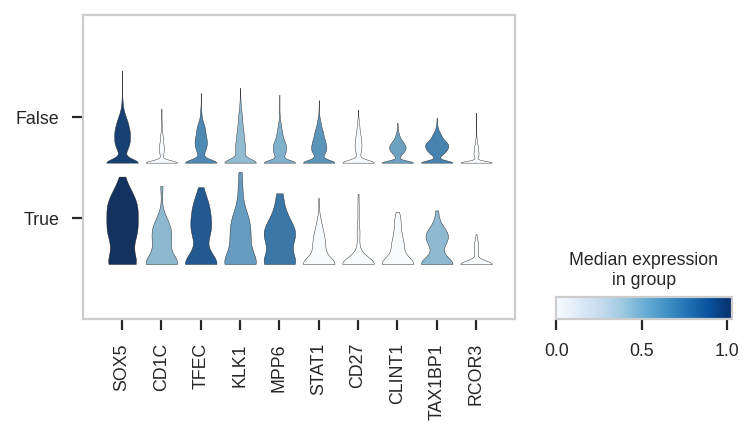

In [38]:
save_figure(fig, "stacked_violin_mzbclones")

In [39]:
mzb_clones = sub_adata[sub_adata.obs.persistent == True].obs.clone_id.values

In [40]:
adata.obs['mzb_clone'] = adata.obs.clone_id.isin(mzb_clones).astype('category')

Text(0, 0.5, 'UMAP 2')

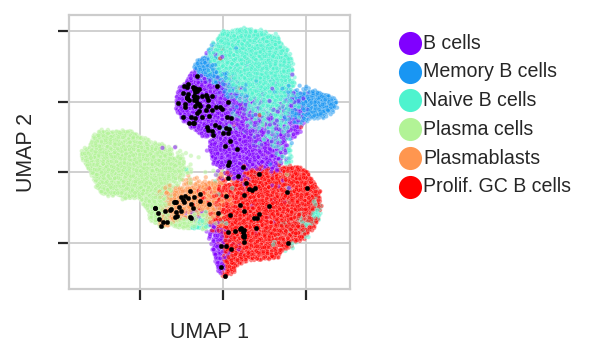

In [41]:
df = getEmbeddingCoordinates(adata, "umap")
df['mzb_clone'] = adata.obs.mzb_clone
df['bcelltype'] = adata.obs.bcelltype
palette = bcelltype_colors
s = 10
custom_legend = True
# Clones
clones = df[df.mzb_clone == True]
# Non Clones
non_clones = df[df.mzb_clone == False]
x = non_clones.iloc[:,0]
y = non_clones.iloc[:,1]

fig, ax = plt.subplots(1, 1)
#ax = sns.scatterplot(x = x , y = y, color = 'k', alpha=0.3, s=s)
ax = sns.scatterplot(data = df, x = x , y = y, hue = 'bcelltype', palette=palette, alpha=0.5, s=s*0.4, rasterized = True, linewidths=0)

# Clones
x = clones.iloc[:,0]
y = clones.iloc[:,1]
ax = sns.scatterplot(x = x , y = y, color = 'k', edgecolor = 'k', linewidths = 0.5, alpha=1, s=s*0.4, rasterized = True)
plt.legend(loc = "upper right", bbox_to_anchor = (1.85, 1))
# Remove UMAP units labels
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
# label axes
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')

In [42]:
save_figure(fig, "persistent_clones")

mzb_clone                                 
False      Prolif. GC B cells_mutated_IGHM    0.447411
           Plasmablasts_mutated_IGHM          0.312262
           Plasma cells_mutated_IGHM          0.120981
           B cells_mutated_IGHM               0.114441
           Naive B cells_mutated_IGHM         0.004905
True       Prolif. GC B cells_mutated_IGHM    0.460526
           Plasmablasts_mutated_IGHM          0.263158
           B cells_mutated_IGHM               0.184211
           Plasma cells_mutated_IGHM          0.092105
           Naive B cells_mutated_IGHM         0.000000
Name: bcelltype_multi, dtype: float64
False    1509
True      402
Name: persistent, dtype: int64


/home/michaelswift/miniconda3/envs/muon/lib/python3.9/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


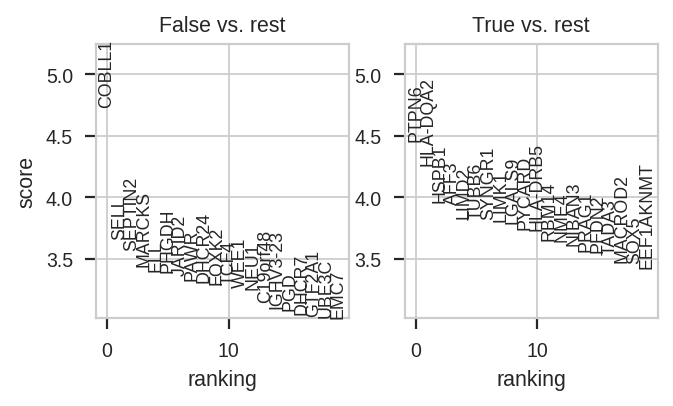

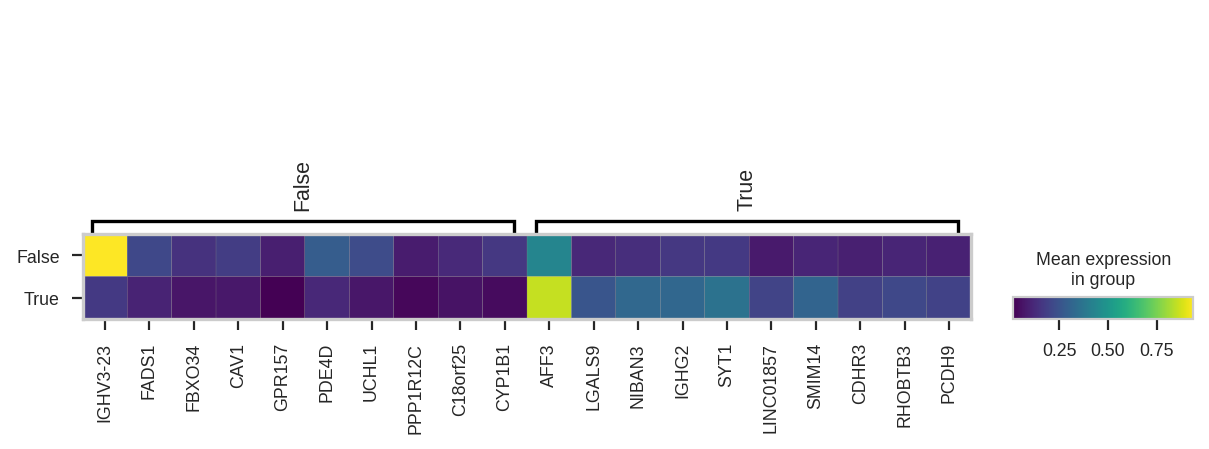

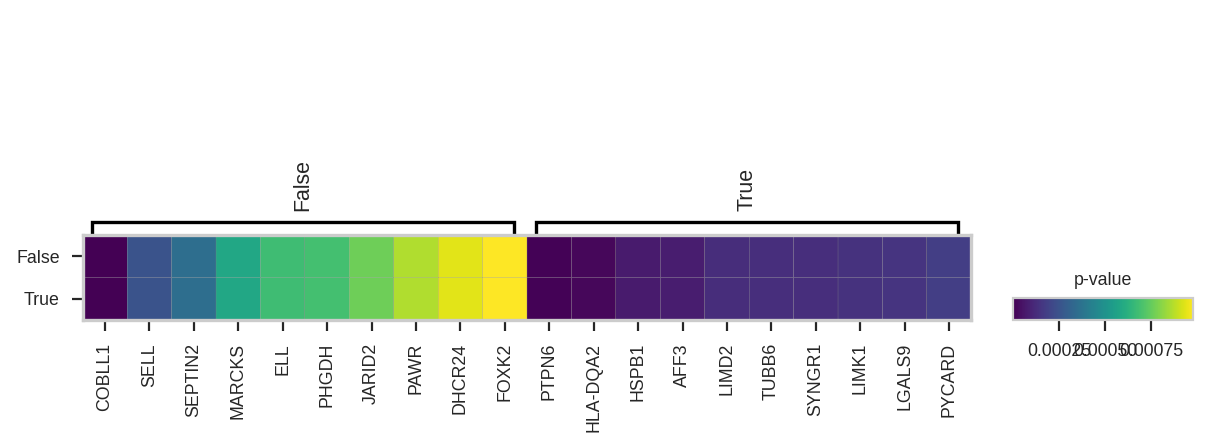

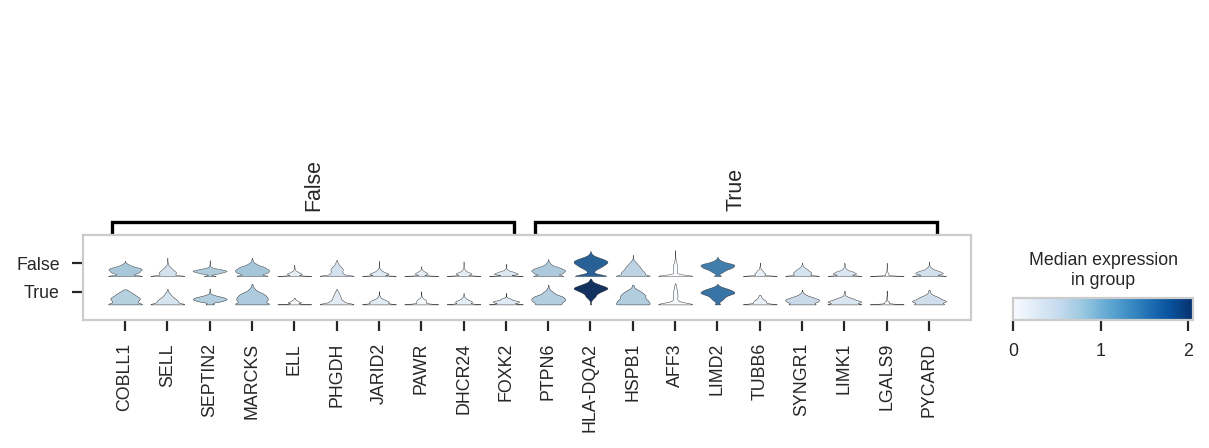

In [43]:
# is the gene expression different between persistent cells and
sub_adata = adata[adata.obs.sample_id.str.contains('Day')]
sub_adata = sub_adata[~sub_adata.obs.sample_id.str.contains('Day 0')]
# subset to only mutated cells to avoid comparison to naive B cells
sub_adata = sub_adata[sub_adata.obs.simple_mutation_status == 'mutated']
sub_adata = sub_adata[sub_adata.obs.isotype_simple == 'IGHM']

print(sub_adata.obs.groupby('mzb_clone')['bcelltype_multi'].value_counts(normalize = True))
print(sub_adata.obs.persistent.value_counts())
sc.tl.rank_genes_groups(sub_adata, groupby='mzb_clone', method='wilcoxon')
sc.pl.rank_genes_groups(sub_adata)
sc.pl.rank_genes_groups_matrixplot(sub_adata, min_logfoldchange=1)
sc.pl.rank_genes_groups_matrixplot(sub_adata, values_to_plot="pvals")
sc.pl.rank_genes_groups_stacked_violin(sub_adata, groupby='persistent')

In [44]:
print(
    "Number of unique clones detected in the Input:",
    ird[~ird.sample_id.str.contains("0")].clone_id.nunique(),
)
dzero = ird[ird.sample_id.str.contains("0")]
selector = ird.clone_id.value_counts() > 1
clone_ids = selector[selector == True].index
print(
    "Number of cells with detected relative:",
    ird[ird.clone_id.isin(clone_ids)].shape[0],
)

print("Number of cells in persistent clones:", persistent.shape[0])

print("Number of persistent clones detected:", persistent.clone_id.nunique())
print(
    "Number of persistent clones with Day 0 ancestors:",
    len(set(dzero.clone_id) & set(persistent.clone_id)),
)

Number of unique clones detected in the Input: 14503
Number of cells with detected relative: 5957
Number of cells in persistent clones: 1601
Number of persistent clones detected: 529
Number of persistent clones with Day 0 ancestors: 69


# Available Fates

Given the Available Fates, are clones more or less potent towards the different ones

In [45]:
def _calculate_available_fates(
    obs_df, fate_column, nboots = nboots, label="clone_id", group="sample_id"
):
    # look at only the differentiation time points:
    data = obs_df
    # only look at clones transiting between fates during the differentiation (after Day 0)
    data = data[~data.sample_id.str.contains("Day 0")]
    # select clones for which multiple fates are possible (i.e. we detect more than one member)
    data = selection_helper(data, "clone_id", 1)
    data.clone_id = data.clone_id.cat.remove_unused_categories()
    print("clones with relative detected:", data.shape[0])
    data.clone_id = data.clone_id.astype("category")
    # Calculate number of fates available
    observed = data.groupby(label)[fate_column].nunique()
    observed = pd.DataFrame(observed).reset_index()
    observed["distribution"] = "observed"
    observed.columns = [label, "fates", "distribution"]
    # Bootstrap routine
    bootstrapped_stats = []
    for i in range(nboots):
        # complete group aware permutation
        data = obs_df.copy()
        data[label] = shuffleWithinGroup(data, label, group)

        # multi clones
        data = selection_helper(data, label, 1)
        # calculate number of fates available
        stat = data.groupby(label)[fate_column].nunique()
        bootstrapped_stats.append(stat)
    bootstrapped_stats = pd.concat(bootstrapped_stats).reset_index()
    bootstrapped_stats["observed"] = "permuted"
    bootstrapped_stats.columns = [label, "fates", "distribution"]
    data = pd.concat([bootstrapped_stats, observed])
    permuted = bootstrapped_stats.fates
    return data

# Perform high resolution leiden clustering and quantify cell fate bias

In [46]:
resolution = 1.2
sc.tl.leiden(adata, resolution=resolution)
x = adata.obs.leiden.value_counts() > 50
x = x[x]
adata = adata[adata.obs.leiden.isin(x.index)]

In [48]:
adata.obs['mut_samp'] = adata.obs['simple_mutation_status'].astype(str) + "_" + adata.obs['sample_id'].astype(str)

/tmp/ipykernel_421652/1005239624.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['mut_samp'] = adata.obs['simple_mutation_status'].astype(str) + "_" + adata.obs['sample_id'].astype(str)


In [49]:
data = adata.obs
nboots = 1000
#data = data[data.simple_mutation_status == 'germline']
data = _calculate_available_fates(
    obs_df=data,
    fate_column="leiden",
    nboots = nboots,
    label="clone_id",
    group="mut_samp",
)

data.reset_index(inplace=True)
data = data.groupby('distribution').sample(n=10000, replace = True)
data.reset_index(inplace = True)



clones with relative detected: 5583


In [50]:
s = np.round(np.abs(data.groupby('distribution').fates.mean()['observed'] - data.groupby('distribution').fates.mean()['permuted']),decimals=2)

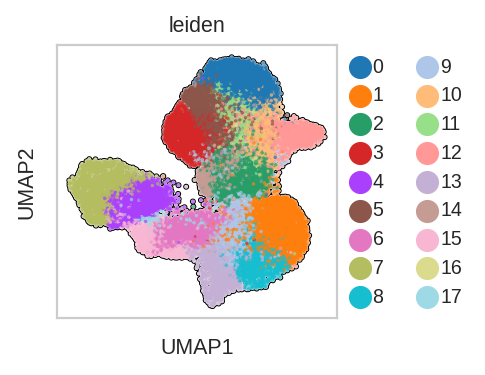

In [51]:
filetype = 'pdf'
color = "leiden"

sc.pl.umap(
    adata,
    color=color,
    size=10,
    add_outline=True,
    save="{}_{}.{}".format(resolution, color, filetype),
)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


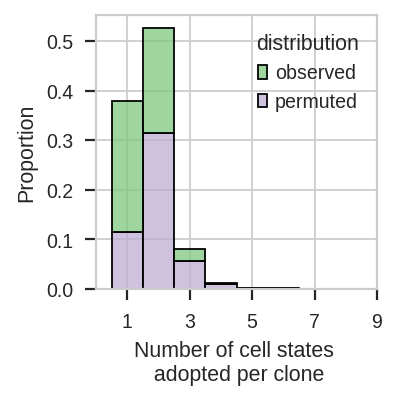

In [52]:
fig, ax = plt.subplots(1,1, figsize=(2.25, 2.25))
sns.histplot(data = data, x="fates", hue="distribution", fill=True, stat = 'proportion', discrete=True, multiple='stack', )
plt.xlabel('Number of cell states \n adopted per clone')
plt.xticks(ticks = [1,3,5,7,9])
plt.xlim(0,9)
#plt.text(x = 3, y = 0.2, s = str(s) + " less fates \n per clone")
save_figure(fig, "Number_of_Cell_States")

In [68]:
# Look at values in the distributions
data.groupby('distribution').fates.value_counts(normalize = True).xs('observed').sort_index() / data.groupby('distribution').fates.value_counts(normalize = True).xs('permuted').sort_index()

fates
1    2.284288
2    0.670426
3    0.408451
4    0.223301
5    0.162162
6         NaN
7         NaN
8         NaN
Name: fates, dtype: float64

In [65]:
data.groupby('distribution').fates.value_counts(normalize = True).xs('observed').sort_index()
#data.groupby('distribution').fates.value_counts(normalize = True).xs('permuted').sort_index()

fates
1    0.5263
2    0.4221
3    0.0464
4    0.0046
5    0.0006
Name: fates, dtype: float64

# Class Switching Amongst Clones

In [34]:
ird = adata.obs
# analyze just timecourse
ird = ird[ird.sample_id.str.contains("Day")]
ird.dropna(subset=["IR_VDJ_1_c_call"], inplace=True)
ird = ird[~ird.IR_VDJ_1_c_call.str.contains("IGHG4")]
ird = ird[ird.IR_VDJ_1_c_call.str.contains("IGH")]
IGHM_clones = ird[ird.IR_VDJ_1_c_call.str.contains("IGHM|IGHD")].clone_id.unique()
IGswitched_clones = ird[
    ~ird.IR_VDJ_1_c_call.str.contains("IGHM|IGHD")
].clone_id.unique()
eligible_clones_df = selection_helper(ird, "clone_id", 1)
# bootstrap
obs_datas = []
nboots = nboots
for boot in range(nboots):
    eligible_clones = eligible_clones_df.sample(frac=1, replace=True)
    switches = []
    clones = []
    for clone_id in eligible_clones.clone_id.unique():
        # generate types of switches
        switch_outcomes = list(
            eligible_clones[eligible_clones.clone_id == clone_id][
                "IR_VDJ_1_c_call"
            ].unique()
        )
        switch_outcomes.sort(key=lambda val: IGH_order[val])
        if len(switch_outcomes) > 1:
            switch_outcomes = " ".join(switch_outcomes)
            switches.append(switch_outcomes)
            clones.append(clone_id)
        if len(switch_outcomes) == 1:
            switch_outcomes = " ".join(switch_outcomes + switch_outcomes)
            switches.append(switch_outcomes)
            clones.append(clone_id)
    obs_data = pd.DataFrame([clones, switches]).T
    obs_data.columns = ["clone", "classes"]
    obs_data = pd.DataFrame(obs_data.classes.value_counts(normalize=True))
    order = list(obs_data.index)
    obs_data.reset_index(inplace=True)
    obs_datas.append(obs_data)

obs_booted = pd.concat(obs_datas)

/tmp/ipykernel_392857/1387195564.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ird.dropna(subset=["IR_VDJ_1_c_call"], inplace=True)


In [35]:
data = obs_booted.groupby("index").mean().reset_index()
data["lower_ci"] = (
    obs_booted.groupby("index").apply(lambda x: np.percentile(x, 2.5)).values
)
data["upper_ci"] = (
    obs_booted.groupby("index").apply(lambda x: np.percentile(x, 97.5)).values
)

In [36]:
obs = data.rename(columns={"classes": "observed_proportions", "index": "switch_type"})

In [37]:
ird = adata.obs
ird = ird[ird.sample_id.str.contains("Day")]
ird.dropna(subset=["IR_VDJ_1_c_call"], inplace=True)
ird = ird[ird.IR_VDJ_1_c_call.str.contains("IGH")]
# remove switch IGHG4 which only occurs once
ird = ird[~ird.IR_VDJ_1_c_call.str.contains("IGHG4")]
# only look at clones
df = selection_helper(ird, "clone_id", 1)
# Caluclate the naive probabilities of detecting a given switch event
# given the population is clones with intraclonal switch events
probabilities = []
switches = []
# all clones
proportions = df.IR_VDJ_1_c_call.value_counts(normalize=True)
# For 1 switcheroo
for first, second in itertools.combinations_with_replacement(proportions.index, 2):
    probability = proportions.loc[first] * proportions.loc[second]
    probabilities.append(probability)
    switching_outcomes = [first, second]
    switching_outcomes.sort(key=lambda val: IGH_order[val])
    switching_outcomes = " ".join(switching_outcomes)
    switches.append(switching_outcomes)
# For 2 switched
for first, second, third in itertools.combinations_with_replacement(
    proportions.index, 3
):
    probability = (
        proportions.loc[first] * proportions.loc[second] * proportions.loc[third]
    )
    probabilities.append(probability)
    switching_outcomes = [first, second, third]
    switching_outcomes.sort(key=lambda val: IGH_order[val])
    switching_outcomes = " ".join(switching_outcomes)
    switches.append(switching_outcomes)

calculated_switch_obs = pd.DataFrame(probabilities, switches)
data = calculated_switch_obs.reset_index()
data.columns = ["index", "classes"]


data.loc[:, "normalized"] = data.loc[:, "classes"] / data.classes.sum()
calc_data = data[data["index"].isin(obs_data["index"])]
order = list(calc_data.sort_values("normalized", ascending=False)["index"])

/tmp/ipykernel_392857/2454234242.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ird.dropna(subset=["IR_VDJ_1_c_call"], inplace=True)


In [38]:
calc_data = calc_data.rename(
    columns={"normalized": "calculated_proportions", "index": "switch_type"}
)

In [39]:
df = pd.merge(calc_data, obs, left_on="switch_type", right_on="switch_type")

In [40]:
df["obs_difference"] = df["observed_proportions"] / df["calculated_proportions"]
df["lower_difference"] = df["lower_ci"] / df["calculated_proportions"]
df["upper_difference"] = df["upper_ci"] / df["calculated_proportions"]
data = df

/home/michaelswift/miniconda3/envs/muon/lib/python3.9/site-packages/seaborn/categorical.py:1733: UserWarning: You passed a edgecolor/edgecolors ([(0.10588235294117647, 0.6196078431372549, 0.4666666666666667), (0.8509803921568627, 0.37254901960784315, 0.00784313725490196), (0.4588235294117647, 0.4392156862745098, 0.7019607843137254), (0.9058823529411765, 0.1607843137254902, 0.5411764705882353), (0.4, 0.6509803921568628, 0.11764705882352941), (0.9019607843137255, 0.6705882352941176, 0.00784313725490196), (0.6509803921568628, 0.4627450980392157, 0.11372549019607843), (0.4, 0.4, 0.4), (0.10588235294117647, 0.6196078431372549, 0.4666666666666667), (0.8509803921568627, 0.37254901960784315, 0.00784313725490196), (0.4588235294117647, 0.4392156862745098, 0.7019607843137254), (0.9058823529411765, 0.1607843137254902, 0.5411764705882353), (0.4, 0.6509803921568628, 0.11764705882352941), (0.9019607843137255, 0.6705882352941176, 0.00784313725490196), (0.6509803921568628, 0.4627450980392157, 0.1137254

Text(0, 0.5, 'switch type')

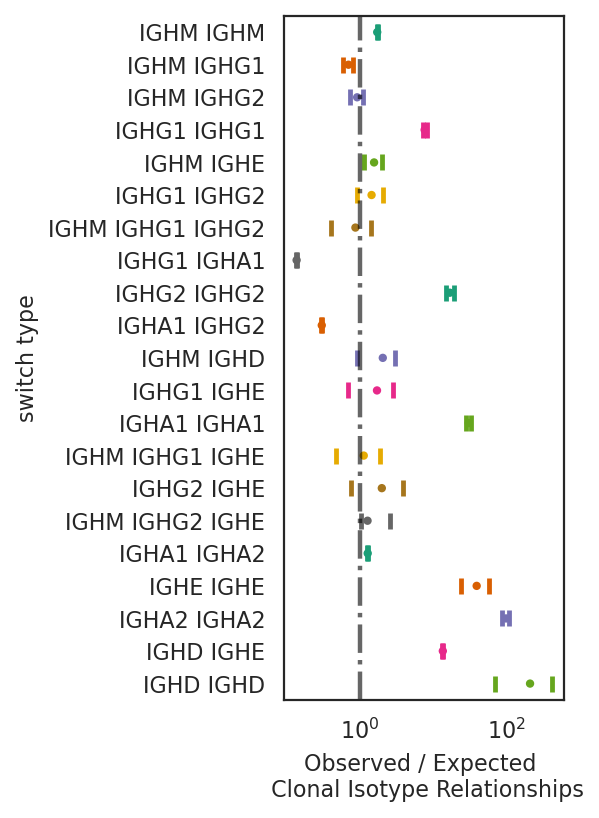

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(width, height * 2.5))

x = data["obs_difference"]
y = data["switch_type"]
low_ci = data["lower_difference"]
hi_ci = data["upper_difference"]
# Data
ax = sns.pointplot(data=data, y=y, x=x, scale=0.8, palette="Dark2", order=order)
# ax.set_xscale("log")
# Confidence Intervals
ax = sns.pointplot(
    data=data,
    x=low_ci,
    y=y,
    ci=None,
    join=False,
    estimator=lambda x: np.percentile(x, 2.5),
    alpha=0.5,
    palette="Dark2",
    order=order,
    markers="|",
    scale=2,
)
ax = sns.pointplot(
    data=data,
    x=hi_ci,
    y=y,
    ci=None,
    join=False,
    estimator=lambda x: np.percentile(x, 97.5),
    alpha=0.5,
    palette="Dark2",
    order=order,
    markers="|",
    scale=2,
)
plt.axvline(x=1, ymin=0, ymax=1, ls="-.", color="k", lw=2, alpha=0.6)
plt.xscale("log")
plt.xlabel("Observed / Expected \n Clonal Isotype Relationships")
plt.ylabel("switch type")

In [42]:
save_figure(fig, "multi-isotype_clones_with_independent_event_model")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
